In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [6]:
DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/train"
#DATADIR = "/home/tasneem/Downloads/data/train1"

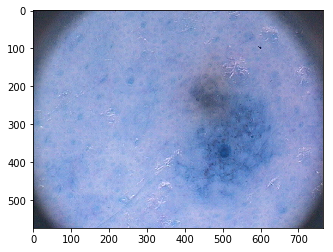

In [7]:
CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]

#this section for testing join path succefully- shold apear an image after run it

for category in CATEGORIES:  # do melanoma and nevi
    path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
    for img in os.listdir(path):  # iterate over each image per melanoma and nevi
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

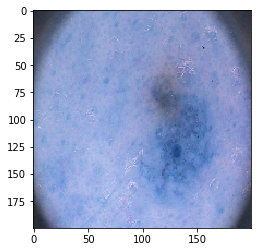

In [8]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show() # it will show the image in the size i written above

In [9]:

# now i began preprocessin(make train set)
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do melanoma and nevi

        path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=melanoma 1=nevus

        for img in tqdm(os.listdir(path)):  # iterate over each image per melanoma and nevi
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            #other way that i didnot find it helpfull for now..(:

create_training_data()

print(len(training_data))

100%|██████████| 35/35 [00:00<00:00, 1211.30it/s]

180


In [10]:
import random

random.shuffle(training_data)#because of our data is orgnized so we need it

In [11]:
for sample in training_data[:10]:
    print(sample[1])#after shuffle it should be not orgized

1
1
0
1
2
1
1
1
0
1


In [12]:
X = []
y = []

for features,label in training_data: #features means images or samples
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[39 47 56]
   [38 46 57]
   [41 47 63]
   ...
   [31 36 44]
   [33 36 47]
   [30 41 53]]

  [[41 53 62]
   [36 47 55]
   [40 51 58]
   ...
   [37 42 56]
   [31 37 50]
   [35 43 49]]

  [[42 50 63]
   [45 51 64]
   [46 53 63]
   ...
   [33 44 50]
   [32 41 50]
   [35 41 47]]

  ...

  [[32 44 65]
   [31 44 65]
   [31 45 68]
   ...
   [25 40 52]
   [23 42 53]
   [27 41 53]]

  [[30 44 69]
   [30 43 69]
   [29 43 65]
   ...
   [27 39 54]
   [24 41 54]
   [26 40 53]]

  [[25 43 64]
   [30 45 63]
   [29 44 62]
   ...
   [20 13 28]
   [14 12 22]
   [17 12 20]]]]


In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()